In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('font',family='NanumGothic')

import os
os.environ["PATH"]+=os.pathsep +os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

In [2]:
df_raw = pd.read_csv("D:\Study\새 폴더\Big Data 분석\Concrete.csv",encoding="euc_kr",engine="python")
df_raw

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [3]:
df_raw_y=df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x=df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis=1,inplace=False)

목표변수, 설명변수 데이터 지정

In [4]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [5]:
df_train_x,df_validation_x,df_train_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=0.428,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("Validation data X size : {}".format(df_validation_x.shape))
print("Validation data Y size : {}".format(df_validation_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
Validation data X size : (309, 8)
Validation data Y size : (309,)


train 데이터 412건, validation 데이터 309건, test 데이터 309건

In [6]:
tree_uncustomized=DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on validation set:{:.3f}".format(tree_uncustomized.score(df_validation_x,df_validation_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set:1.000
Score on validation set:0.689
Score on test set:0.699


In [7]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

=> train데이터는 설명력은100%, 반면 validation, test 데이터의 설명력은 낮음 : 과대적합

In [8]:
train_score=[];validation_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["Validation"]=validation_score

=> 모델 parameter 조정 : min_samples_leaf:입사귀 노드의 최소자료 수 변경에 따른 모델 성능

In [9]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,Validation
0,1,1.000,0.689
1,2,0.984,0.688
2,3,0.962,0.688
3,4,0.948,0.718
4,5,0.918,0.681
5,6,0.908,0.678
6,7,0.889,0.679
7,8,0.876,0.671
8,9,0.862,0.659
9,10,0.857,0.663


c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


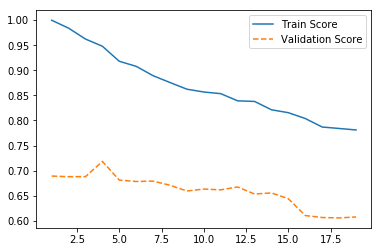

In [10]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,validation_score,linestyle="--",label="Validation Score")
plt.legend()

=> min_samples_leaf = 4개 적절

- 잎사귀 노드의 최소 자류 수 변경 결과 비교(4vs12)

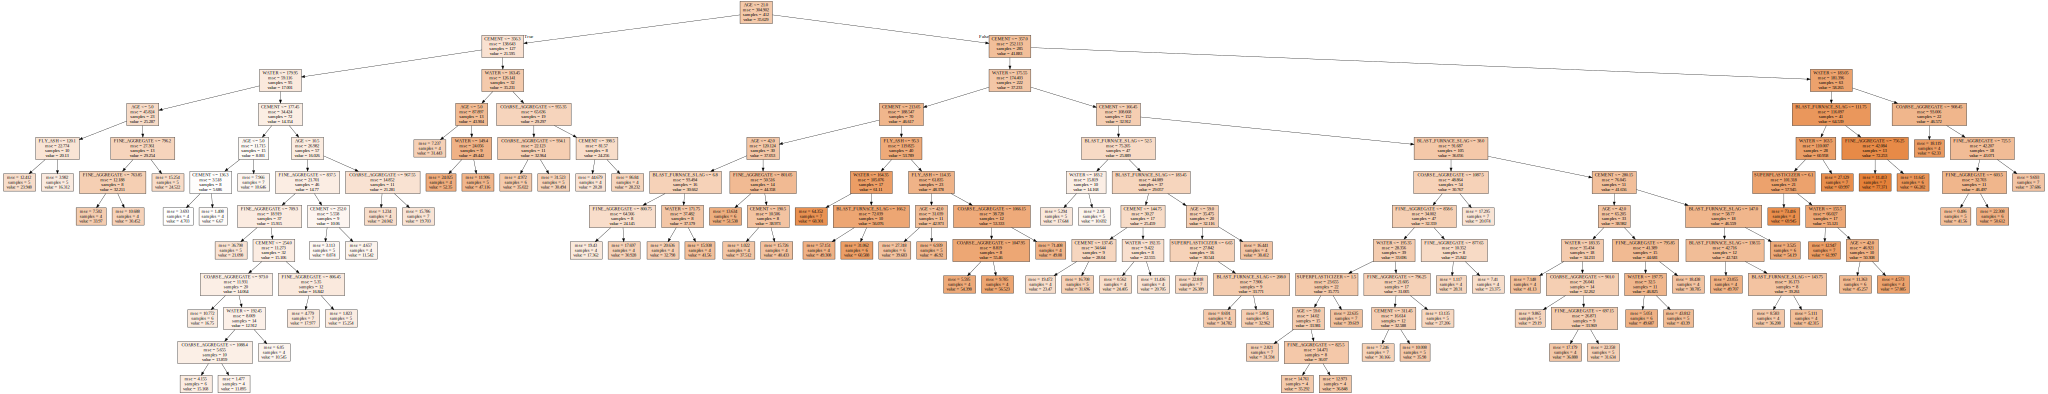

In [11]:
v_feature_names=df_train_x.columns
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=4)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_leaf.dot",
               feature_names=v_feature_names,impurity=True,filled=True)
with open("tree_leaf.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

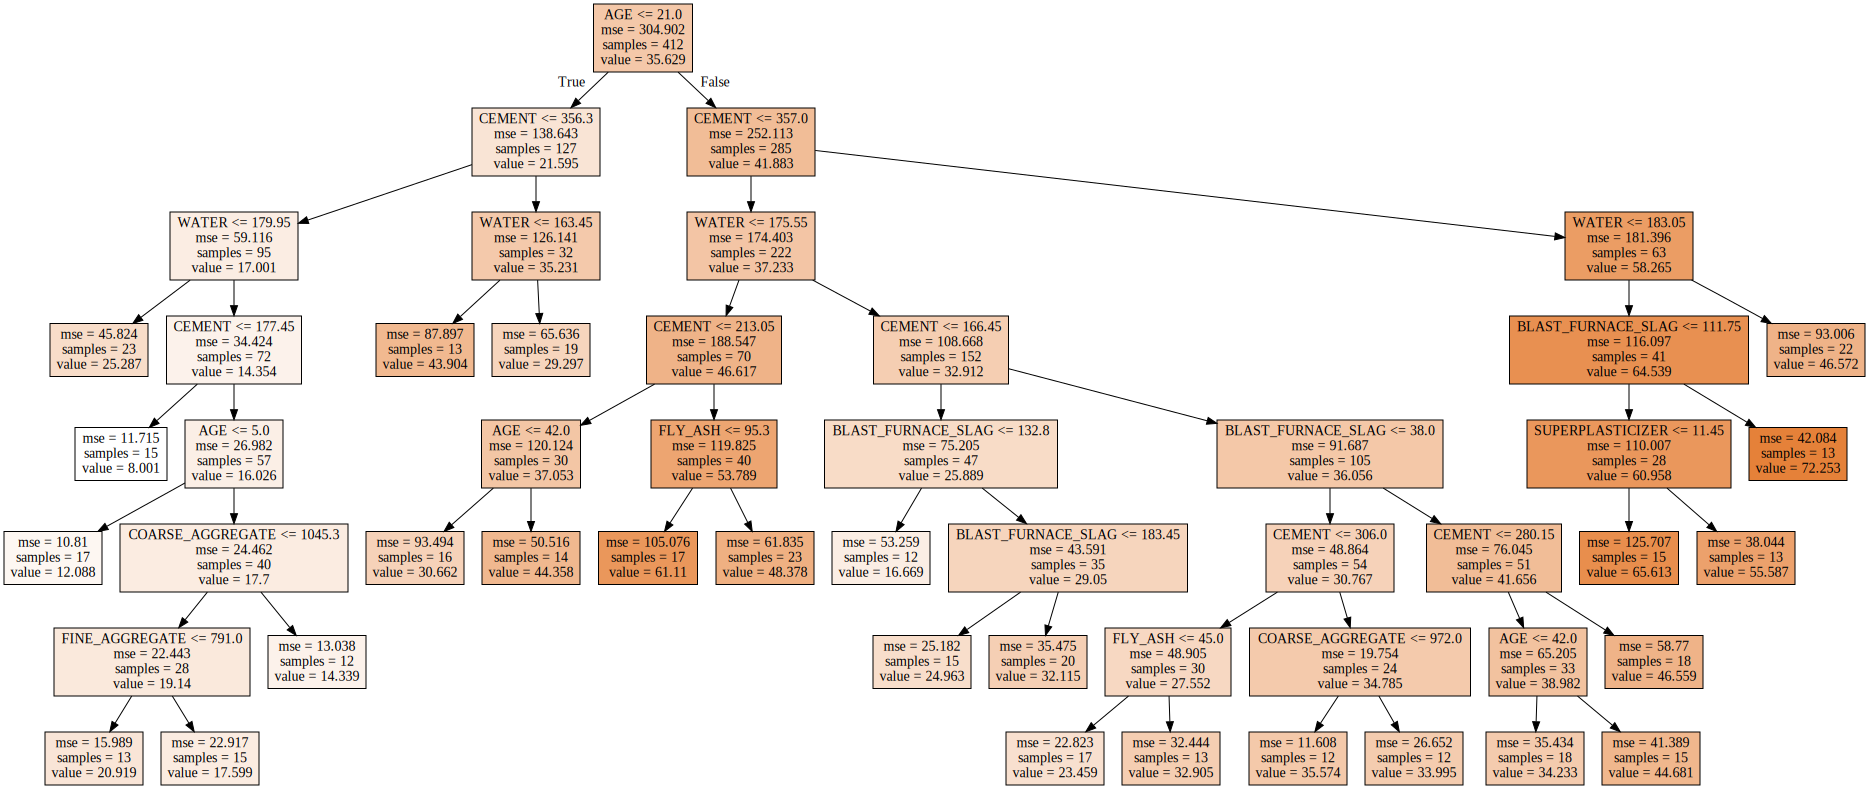

In [12]:
v_feature_names=df_train_x.columns
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=12)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_leaf.dot",
               feature_names=v_feature_names,impurity=True,filled=True)
with open("tree_leaf.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

 입사귀 노드의 최소 자료 수 변경 결과 비교(4vs12):과대적합 확인 ->분리 노드 최소 자료 수 조정 필요

In [13]:
train_score=[];validation_score=[];
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=4,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["Validation"]=validation_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,Validation
0,4,0.948,0.718
1,6,0.948,0.718
2,8,0.948,0.718
3,10,0.939,0.712
4,12,0.926,0.700
5,14,0.910,0.703
6,16,0.902,0.693
7,18,0.884,0.680
8,20,0.873,0.660
9,22,0.865,0.665


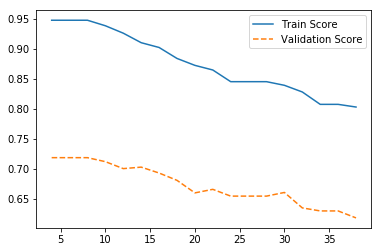

In [14]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,validation_score,linestyle="--",label="Validation Score")
plt.legend()

=> min_samples_split =>24개가 적절

- 분리노드의 최소 자료 수 변경 결과 비교(24vs30)

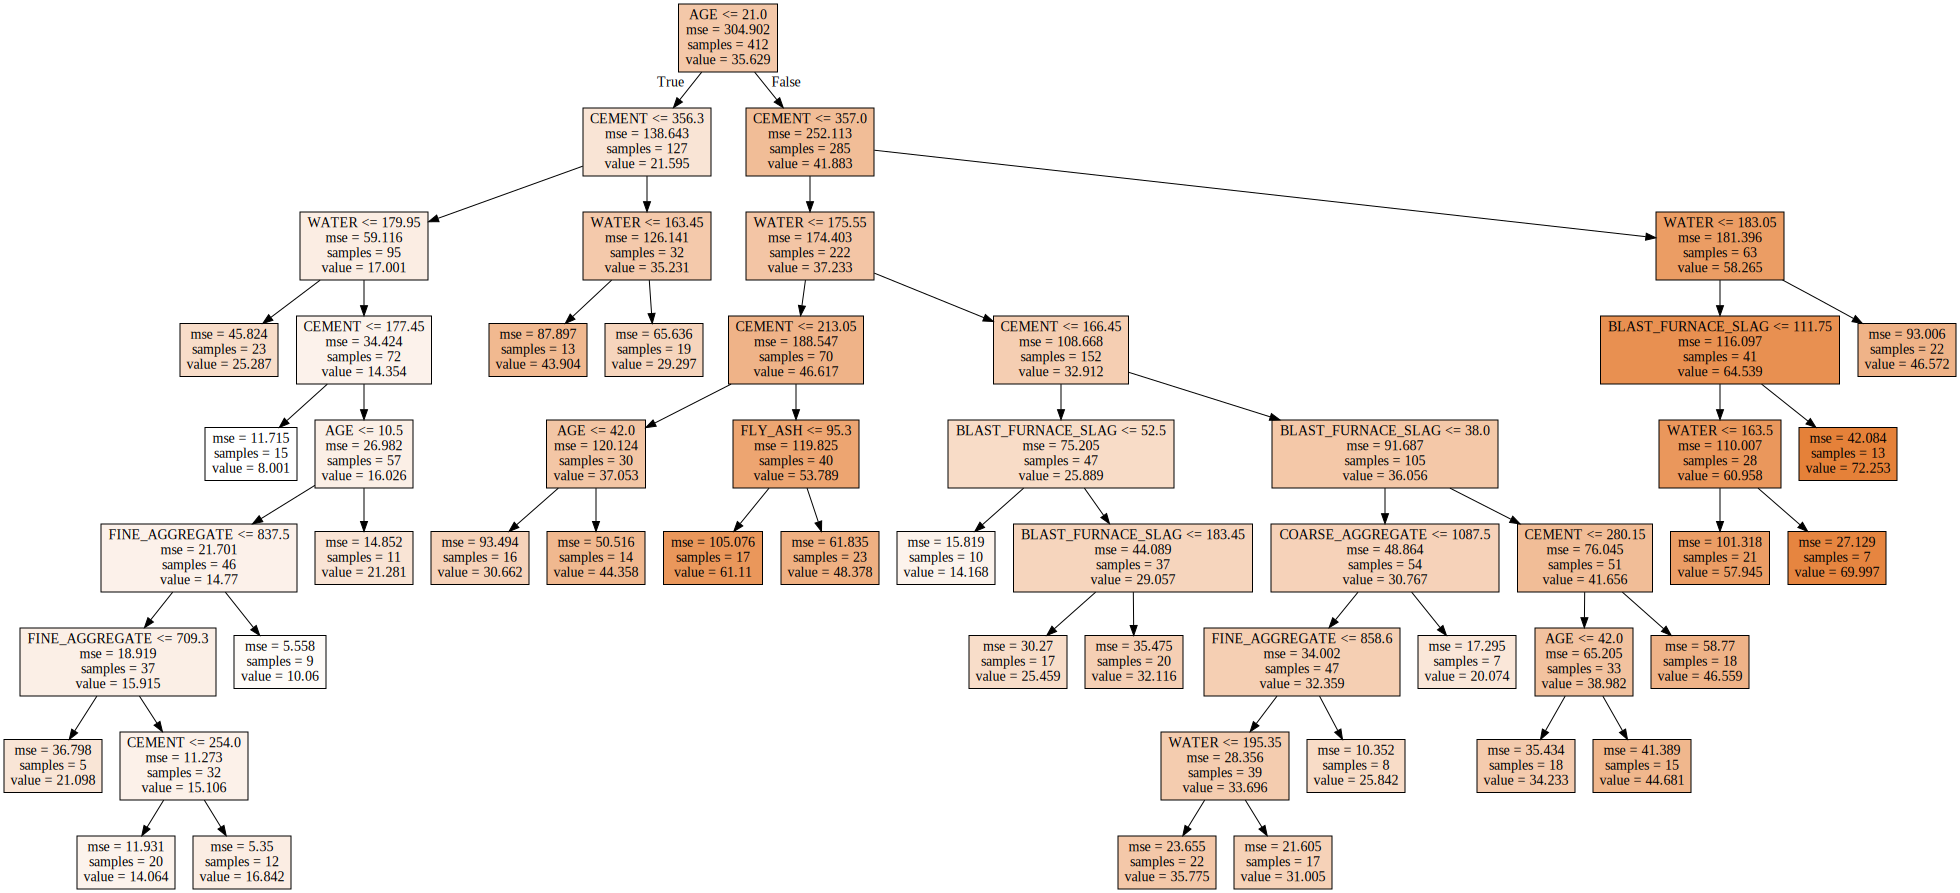

In [15]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=24)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot",
               feature_names=v_feature_names,impurity=True,filled=True)
with open("tree_split.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

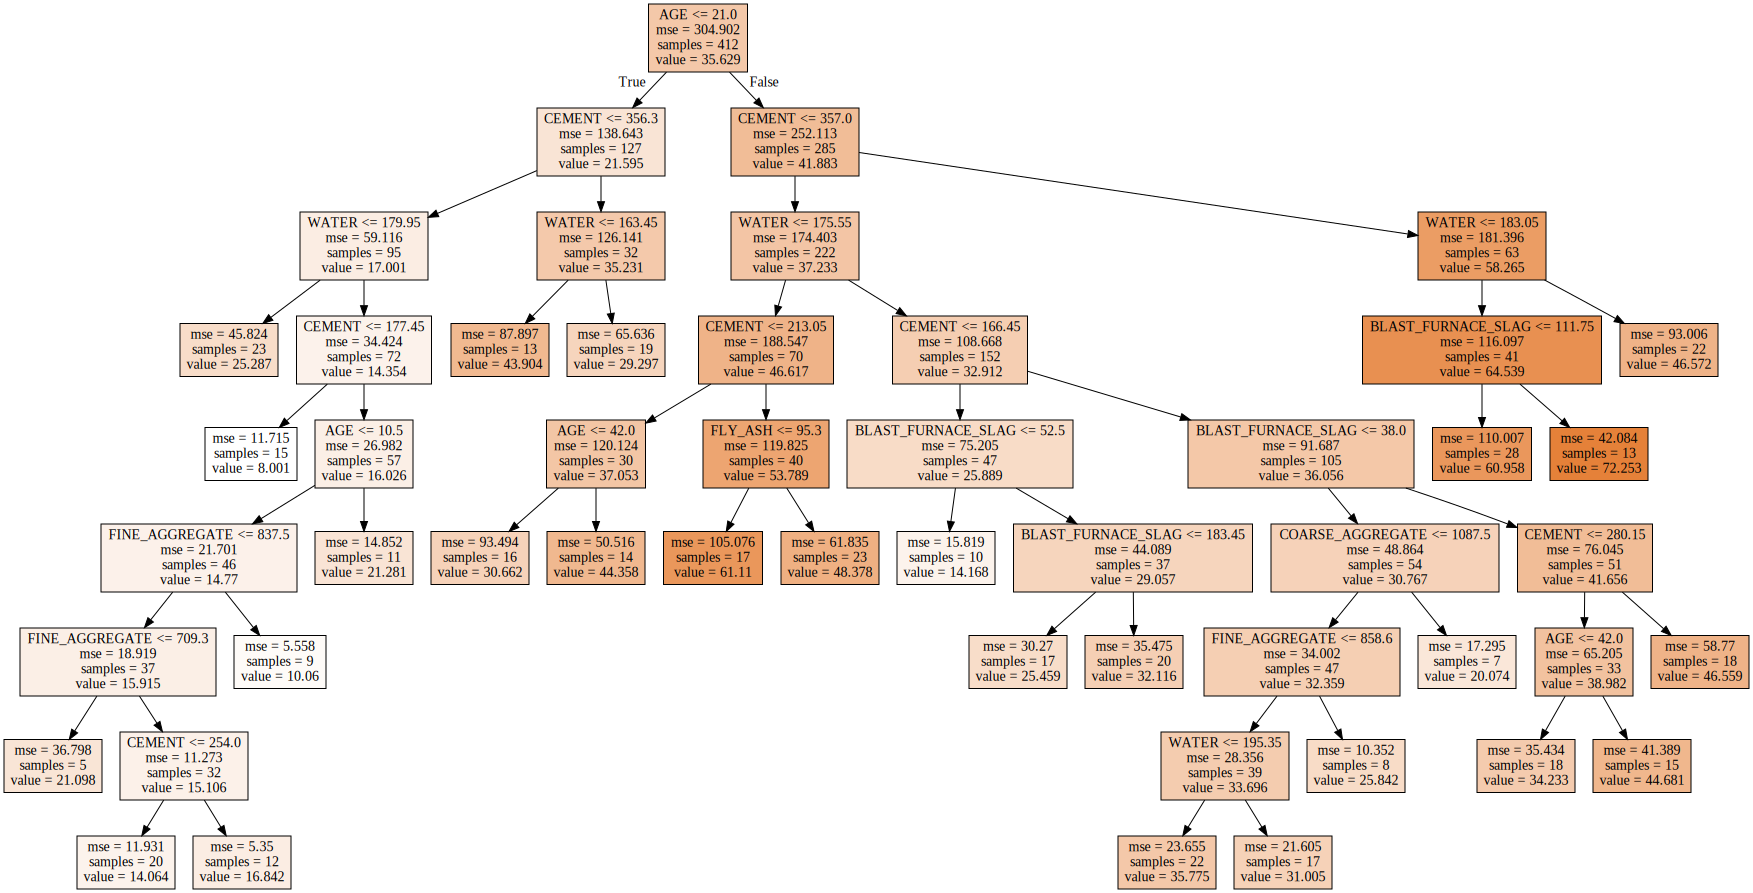

In [16]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=30)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot",
               feature_names=v_feature_names,impurity=True,filled=True)
with open("tree_split.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

=> 분리 노드의 최소 자료 수 변경 결과 비교(24vs30) : 과대적합 확인 -> 최대 깊이 조정 필요

- max_depth:최대 깊이 변경에 따른 모델 성능

In [17]:
train_score=[];validation_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=24,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    
df_score_depth= pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["Validation"]=validation_score
df_score_depth.round(3)

,Depth,TrainScore,Validation
0,1,0.288,0.190
1,2,0.524,0.400
2,3,0.662,0.482
3,4,0.742,0.565
4,5,0.814,0.603
5,6,0.832,0.628
6,7,0.843,0.653
7,8,0.845,0.654
8,9,0.845,0.654
9,10,0.845,0.654


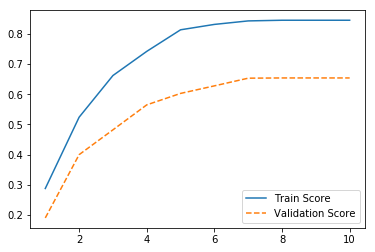

In [18]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,validation_score,linestyle="--",label="Validation Score")
plt.legend()

=> max_depth=2개 또는 4개 적절(3 모델의 성능이 유사함)

- 최대 깊이 변경 결과 비교(2vs4)

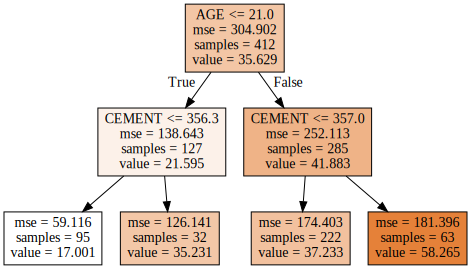

In [19]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=24,max_depth =2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_depth.dot",
               feature_names=v_feature_names,impurity=True,filled=True)
with open("tree_depth.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

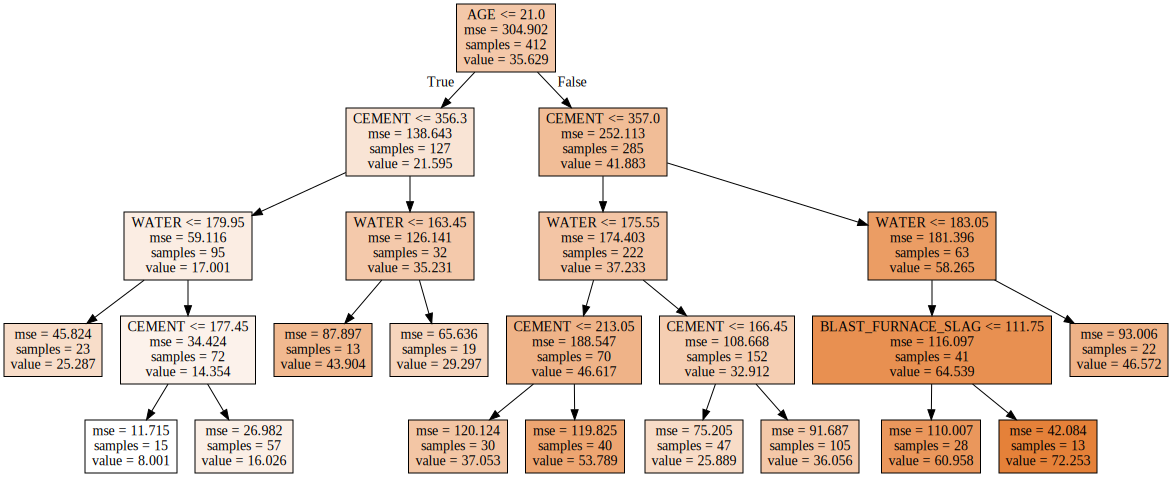

In [20]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=24,max_depth =4)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_depth.dot",
               feature_names=v_feature_names,impurity=True,filled=True)
with open("tree_depth.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

=> 최대 깊이 변경 결과 비교(2vs4) : 깊이=2는 과소적합, 깊이=4가 적절

# 최종모델 선정 / 시각화

- 최종모델 : min_samples_leaf=5, min_samples_split=25, max_depth=4

In [21]:
tree_final=DecisionTreeRegressor(random_state=1234,min_samples_leaf=4,min_samples_split=24,max_depth=4)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=24, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

- 최종모델 시각화

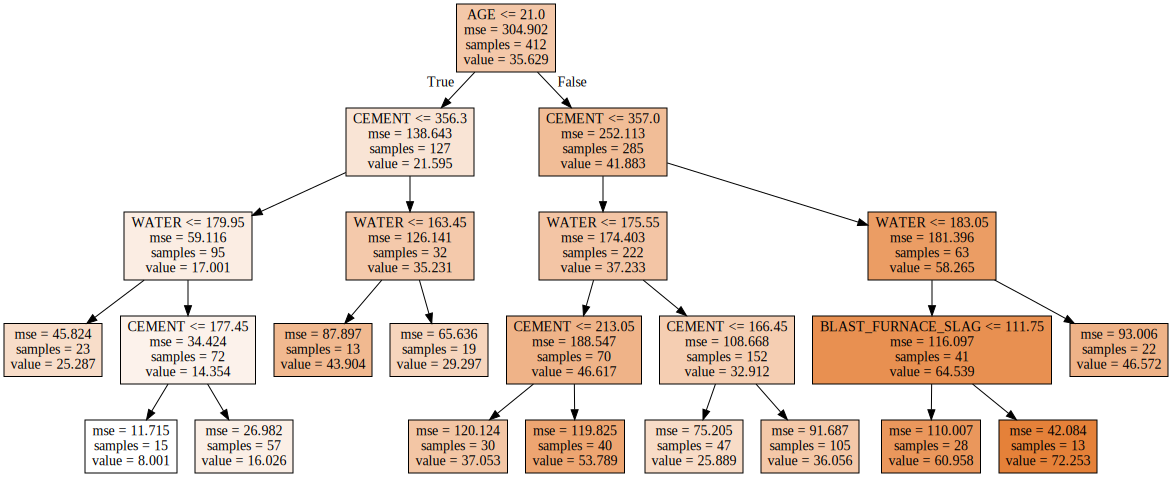

In [22]:
export_graphviz(tree_final,out_file="tree_final.dot",
                feature_names=v_feature_names,impurity =True, filled=True)

with open("tree_final.dot")as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

- 부모노드:최상위 노드에서 AGE > 21.0 이면 해당 자료수는 285개 이고 콘크리트 강도가 증가하고 mse도 상당히 개선됨.
- 최대 깊이가 증가하면서 생성된느 잎사귀의 자료수는 감소하고 모델의 MSE 또한 지속적으로 감소하지만, 분리조건에 따라 콘크리트 강도는 상위 노드 대비 증가하거나 감소함.

# 결론도출

In [23]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_names
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
0,CEMENT,0.414
7,AGE,0.388
3,WATER,0.186
1,BLAST_FURNACE_SLAG,0.012
2,FLY_ASH,0.000
4,SUPERPLASTICIZER,0.000
5,COARSE_AGGREGATE,0.000
6,FINE_AGGREGATE,0.000


- 테이블을 중요도별로 저장

Text(0, 0.5, '변수')

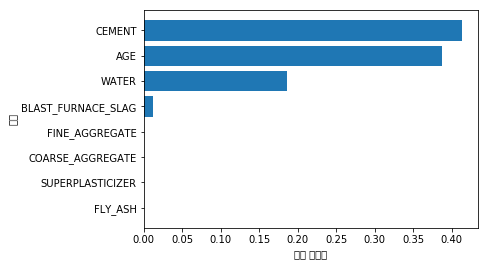

In [24]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- 설명변수 중요도 그래프 / 중요도가 높은 변수를 상위에 그림

- CEMENT, AGE, WATER 순으로 영향을 줌

# GridSearchCV를 이용한 최적 parameter 찾기

In [35]:
estimator =DecisionTreeRegressor()

param_grid={"criterion":["mse","friedman_mse","mae"],"max_features":["auto","sqrt","log2"],"max_depth":para_depth,"min_samples_split":para_split,"min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))


c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
DecisionTreeRegressor(criterion='mae', max_depth=9, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

best parameter:
{'criterion': 'mae', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6}

best score:
0.777


c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


- mae 값은 max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6

- GridSearchCV에서는 mae 기준에서 최적 모델 도출
(mse 결과와 상이함)

# 결론

- predict() 함수를 이용한 test set의 예측값 도출

In [25]:
pred = tree_final.predict(df_test_x)
print(pred)

[25.28695652 16.02631579 46.57227273 25.28695652 37.05333333 36.05580952
 36.05580952 25.28695652 43.90384615 60.95785714 16.02631579 36.05580952
 36.05580952 29.29736842 37.05333333 46.57227273 25.28695652 25.28695652
 36.05580952  8.00066667 43.90384615 36.05580952 36.05580952 25.88914894
 43.90384615 37.05333333 36.05580952 29.29736842 25.88914894 25.88914894
 53.78925    25.88914894 36.05580952 37.05333333 36.05580952 16.02631579
 16.02631579 36.05580952 25.28695652 29.29736842 16.02631579 37.05333333
 29.29736842 25.88914894 36.05580952 25.88914894 36.05580952 25.88914894
 43.90384615 16.02631579 53.78925    25.28695652 53.78925    53.78925
 53.78925    60.95785714 36.05580952 36.05580952 25.28695652 37.05333333
 72.25307692 25.28695652 36.05580952 16.02631579 43.90384615 36.05580952
 72.25307692 60.95785714 25.88914894 36.05580952 36.05580952 25.28695652
 46.57227273 25.28695652 53.78925    60.95785714 16.02631579 29.29736842
 36.05580952 60.95785714 36.05580952 53.78925    36.05

In [26]:
mean_squared_error(df_test_y,pred,multioutput='raw_values')

array([95.5263523])

In [27]:
mean_absolute_error(df_test_y,pred,multioutput='raw_values')

array([7.88594464])

- mse 값은 95.526 이다.
- mae 값은 7.885 이다.